# KF6 - Gamma Spectroscopy


## Table of Content

* [Read experimental data from file](#read)
    * [Loading spectra taken by NaI(Tl) detector](#read_na)
    * [Loading spectra taken by HPGe detector ](#read_ge)

* [Analyzing the data](#fit)
    * [Task 1: Main features of $\gamma$-spectra](#features)
    * [Task 2: Energy calibration of the NaI(Tl) and HPGe detectors](#calibration)
    * [Task 3: Full width at half maximum (FWHM) as a function of a $\gamma$-ray energy](#fwhm)
    * [Task 4: $^{22}$Na $\gamma$-spectrum and relative peak intensity](#na22)
    * [Task 5: $^{137}$Cs and the internal conversion coefficient of $^{137}$Ba](#internal)
    * [Task 6: Binding energy of the deuteron](#deuteron)
    * [Task 7: Background radiation ](#background)

### Importing python packages <a name="import"></a>

In [1]:
#This code cell holds useful code needed for the analysis. Execute it like normal.
# Packages to help importing files 
import sys, os
sys.path.append('./lib')

# Package that supports working with large arrays
import numpy as np  

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib widget

# The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# Custom pakages prepared for you to analyze experimental data from labs.
# The code is located in the 'lib' subfolder which we have to specify:
sys.path.append('./lib')
import MCA, fittingFunctions

----------------------------------------------------------------------------------------------------------

# Reading experimental data <a name="read"></a>

## Loading spectra taken by NaI(Tl) detector <a name="read_na"></a>

With the help of the function `load_spectrum` from package `MCA` one can read the experimental data from one data file as follows:

In [2]:
#Load your data files here:
Co60_NaI  = MCA.load_spectrum("Gamma_data/60CoGamma1.Spe")
Cs137_NaI = MCA.load_spectrum("Gamma_data/137CsGamma1.Spe")
Na22_NaI  = MCA.load_spectrum("Gamma_data/22NaGamma1.Spe")

## Loading spectra taken by HPGe detector <a name="read_ge"></a>

In [4]:
#Load your data files here:
Co60_Ge  = MCA.load_spectrum("Gamma_data/Semiconductor-60Co.Spe")
Cs137_Ge = MCA.load_spectrum("Gamma_data/Semiconductor-137Cs.Spe")
Na22_Ge  = MCA.load_spectrum("Gamma_data/Semiconductor-22Na.Spe")
#Rock_Ge = MCA.load_spectrum("")

## Loading spectra taken by BGO detector during Neutron lab<a name="read_ambe"></a>

In [5]:
#Load your data files here:
AmBe_BGO = MCA.load_spectrum("Gamma_data/AmBe_from_neutron.Spe")

----------------------------------------------------------------------------------------------------------

# Analyzing the data <a name="fit"></a>

Many help functions have been implemented to help you analyze the data from the lab and the code is stored in [MCA.py](./lib/MCA.py) and [fittingFunctions.py](./lib/fittingFunctions.py). Run [Intro_notebook.ipynb](./Intro_notebook.ipynb) to see loads of examples on how to use the code that we implemented for you for analyzing your data from the gamma lab. Feel free to copy paste cells from the notebook and use them for your analysis.

## Task 1: Main features of $\gamma$-spectra <a name="features"></a>

Text(0.5, 1.0, '$^{137}$Cs, Semiconductor')

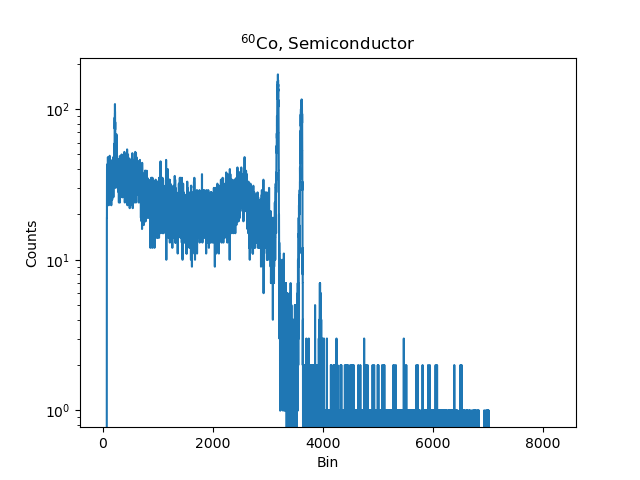

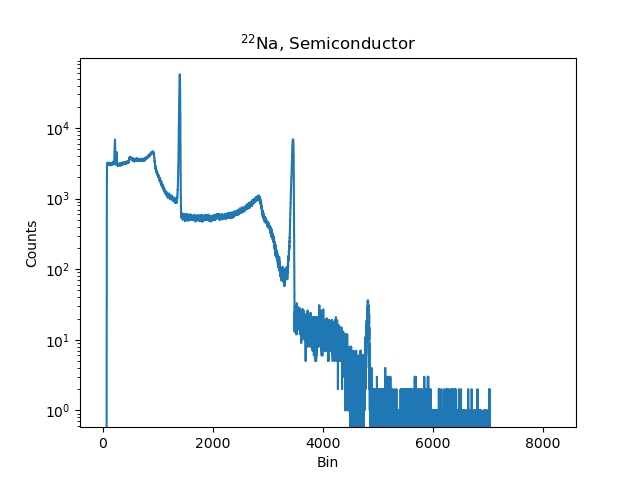

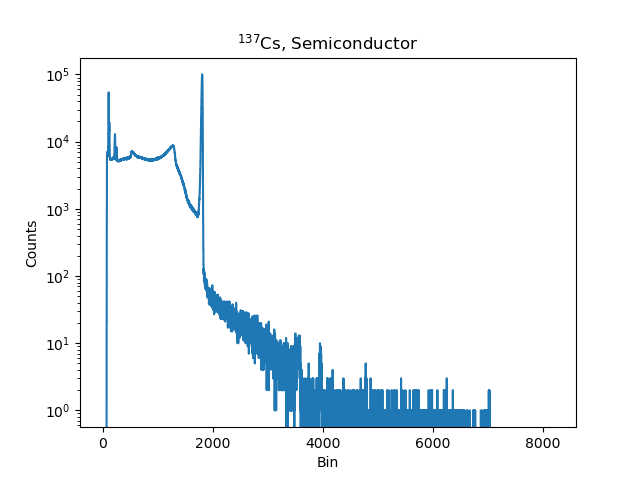

In [9]:
### your code goes here 


figCo, axCo = plt.subplots(1,1)
figNa, axNa = plt.subplots(1,1)
figCs, axCs = plt.subplots(1,1)

axCo.step(Co60_Ge.bin_centers, Co60_Ge.counts, where='mid')
axNa.step(Na22_Ge.bin_centers, Na22_Ge.counts, where='mid')
axCs.step(Cs137_Ge.bin_centers, Cs137_Ge.counts, where='mid')

axCo.set_xlabel('Bin')
axNa.set_xlabel('Bin')
axCs.set_xlabel('Bin')

axCo.set_ylabel('Counts')
axNa.set_ylabel('Counts')
axCs.set_ylabel('Counts')

axCo.set_yscale('log')
axNa.set_yscale('log')
axCs.set_yscale('log')

axCo.set_title(r'$^{60}$Co, Semiconductor')
axNa.set_title(r'$^{22}$Na, Semiconductor')
axCs.set_title(r'$^{137}$Cs, Semiconductor')


## Task 2: Energy calibration of the NaI(Tl) and HPGe detectors <a name="calibration"></a>

Text(0.5, 1.0, '$^{137}$Cs, Semiconductor')

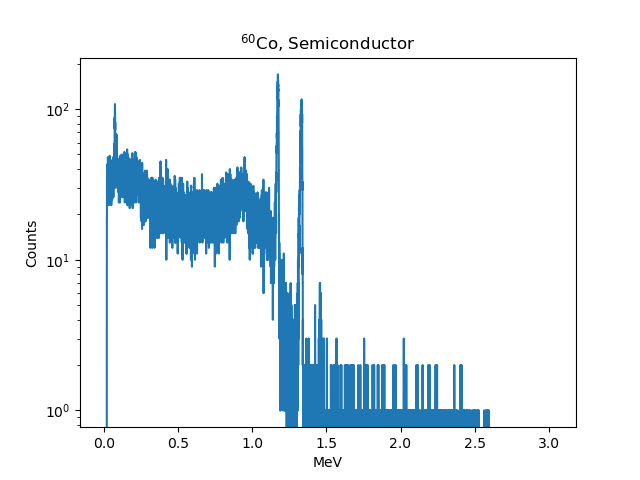

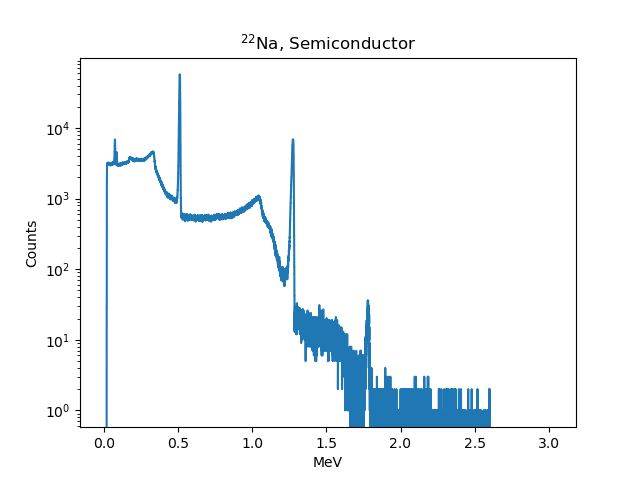

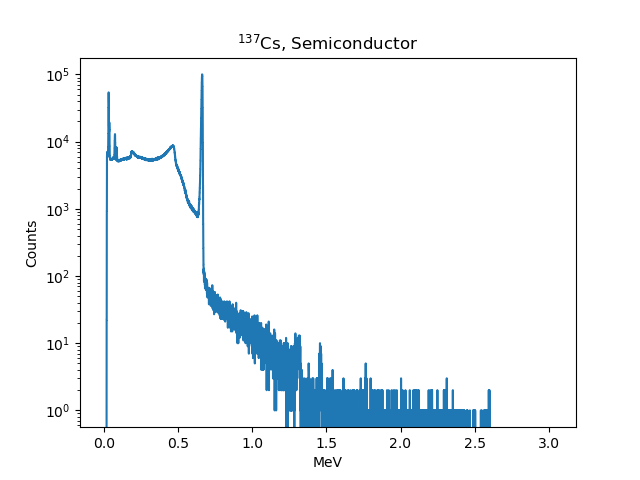

In [20]:
### your code goes here 

bin_Co = np.array([3617, 3186])
energy_Co = np.array([1.3325, 1.1732])

bin_Na = np.array([3461])
energy_Na = np.array([1.2746])

bin_Cs = np.array([1810])
energy_Cs = np.array([0.661659])

k = 0.00037150
m = -0.01134058

Co60_Ge.calibrate(k, m)
Na22_Ge.calibrate(k, m)
Cs137_Ge.calibrate(k, m)

figCo, axCo = plt.subplots(1,1)
figNa, axNa = plt.subplots(1,1)
figCs, axCs = plt.subplots(1,1)

axCo.step(Co60_Ge.energy, Co60_Ge.counts, where='mid')
axNa.step(Na22_Ge.energy, Na22_Ge.counts, where='mid')
axCs.step(Cs137_Ge.energy, Cs137_Ge.counts, where='mid')

axCo.set_xlabel('MeV')
axNa.set_xlabel('MeV')
axCs.set_xlabel('MeV')

axCo.set_ylabel('Counts')
axNa.set_ylabel('Counts')
axCs.set_ylabel('Counts')

axCo.set_yscale('log')
axNa.set_yscale('log')
axCs.set_yscale('log')

axCo.set_title(r'$^{60}$Co, Semiconductor')
axNa.set_title(r'$^{22}$Na, Semiconductor')
axCs.set_title(r'$^{137}$Cs, Semiconductor')


## Task 3: Full width at half maximum (FWHM) as a function of a $\gamma$-ray energy <a name="fwhm"></a>

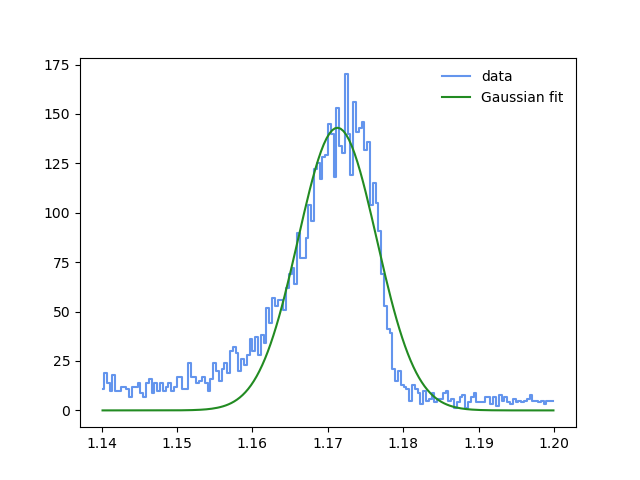

Estimated parameters:
 A = 142.99689, mu = 1.17128,  sigma = 0.00521 

Uncertainties in the estimated parameters: 
 σ²(A) = 11.68423, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.16842345e+01  9.50555550e-10 -2.83905268e-04]
 [ 9.50555550e-10  2.06951171e-08 -3.46409717e-14]
 [-2.83905268e-04 -3.46409717e-14  2.06951175e-08]]


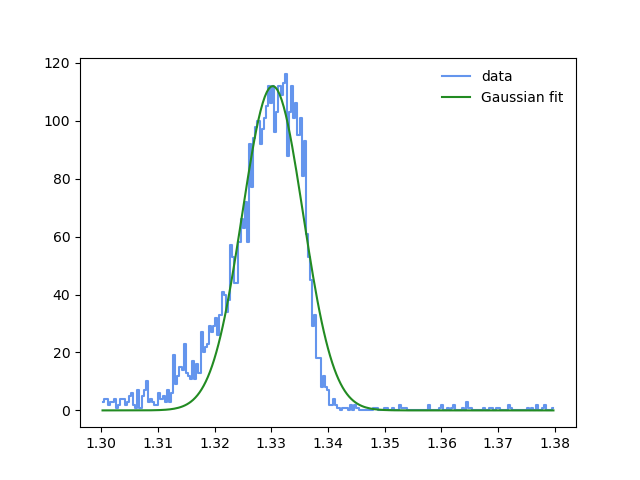

Estimated parameters:
 A = 111.97324, mu = 1.33024,  sigma = 0.00536 

Uncertainties in the estimated parameters: 
 σ²(A) = 3.65899, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[3.65898988e+00 4.32268944e-10 1.16778517e-04]
 [4.32268944e-10 1.11811365e-08 2.06993595e-14]
 [1.16778517e-04 2.06993595e-14 1.11811365e-08]]


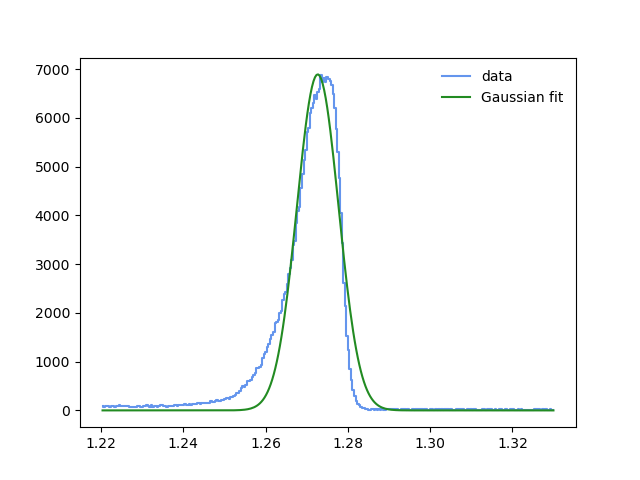

Estimated parameters:
 A = 6894.69204, mu = 1.27267,  sigma = 0.00506 

Uncertainties in the estimated parameters: 
 σ²(A) = 9263.64226, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[9.26364226e+03 1.69755133e-08 4.53218112e-03]
 [1.69755133e-08 6.65202670e-09 1.24511448e-14]
 [4.53218112e-03 1.24511448e-14 6.65202679e-09]]


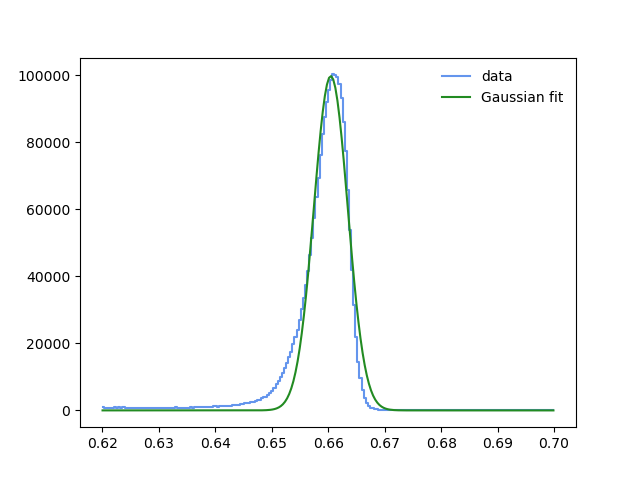

Estimated parameters:
 A = 99755.73557, mu = 0.66046,  sigma = 0.00300 

Uncertainties in the estimated parameters: 
 σ²(A) = 1591815.17328, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.59181517e+06  1.04721734e-07 -3.19351454e-02]
 [ 1.04721734e-07  1.92205768e-09 -3.15283669e-15]
 [-3.19351454e-02 -3.15283669e-15  1.92205769e-09]]
--------------
Full width half maximum for the first Cobalt peak is 0.012273680358983305 MeV
Full width half maximum for the second Cobalt peak is 0.012624101955906877 MeV
Full width half maximum for the Sodium peak is 0.01191580574782605 MeV
Full width half maximum for the Cesium peak is 0.007069600927793699 MeV


In [26]:
### your code goes here 

Co60_peak1 = fittingFunctions.perform_Gaussian_fit(	x=Co60_Ge.energy, 
                                             		y=Co60_Ge.counts,      
                                              		region_start=1.14,   # bins where to start fitting
                                              		region_stop=1.2,    # bins where to stop fitting
                                              		mu_guess=1.17,       # guess for the position of peak centroid
                                              		A_guess=170,       # guess for the amplitude of the peak
                                              		sigma_guess=1)      # guess for the sigma

Co60_peak2 = fittingFunctions.perform_Gaussian_fit(	x=Co60_Ge.energy, 
                                             		y=Co60_Ge.counts,      
                                              		region_start=1.3,   # bins where to start fitting
                                              		region_stop=1.38,    # bins where to stop fitting
                                              		mu_guess=1.33,       # guess for the position of peak centroid
                                              		A_guess=110,       # guess for the amplitude of the peak
                                              		sigma_guess=1)      # guess for the sigma

Na22_peak = fittingFunctions.perform_Gaussian_fit(	x=Na22_Ge.energy, 
                                             		y=Na22_Ge.counts,      
                                              		region_start=1.22,   # bins where to start fitting
                                              		region_stop=1.33,    # bins where to stop fitting
                                              		mu_guess=1.27,       # guess for the position of peak centroid
                                              		A_guess=6800,       # guess for the amplitude of the peak
                                              		sigma_guess=1)      # guess for the sigma


Cs137_peak = fittingFunctions.perform_Gaussian_fit(	x=Cs137_Ge.energy, 
                                             		y=Cs137_Ge.counts,      
                                              		region_start=0.62,   # bins where to start fitting
                                              		region_stop=0.7,    # bins where to stop fitting
                                              		mu_guess=0.66,       # guess for the position of peak centroid
                                              		A_guess=100000,       # guess for the amplitude of the peak
                                              		sigma_guess=1)      # guess for the sigma




In [36]:
Co60_FWHM1 = 2.355*Co60_peak1.sigma
Co60_FWHM2 = 2.355*Co60_peak2.sigma
Na22_FWHM = 2.355*Na22_peak.sigma
Cs137_FWHM = 2.355*Cs137_peak.sigma


print(f"Full width half maximum for the first Cobalt peak is {round(Co60_FWHM1,5)} MeV with a peak {round(Co60_peak1.mu,5)} MeV")
print(f"Full width half maximum for the second Cobalt peak is {round(Co60_FWHM2,5)} MeV with a peak {round(Co60_peak2.mu,5)} MeV")
print(f"Full width half maximum for the Sodium peak is {round(Na22_FWHM,5)} MeV with a peak {round(Na22_peak.mu,5)} MeV")
print(f"Full width half maximum for the Cesium peak is {round(Cs137_FWHM,5)} MeV with a peak {round(Cs137_peak.mu,5)} MeV")



Full width half maximum for the first Cobalt peak is 0.01227 MeV with a peak 1.17128 MeV
Full width half maximum for the second Cobalt peak is 0.01262 MeV with a peak 1.33024 MeV
Full width half maximum for the Sodium peak is 0.01192 MeV with a peak 1.27267 MeV
Full width half maximum for the Cesium peak is 0.00707 MeV with a peak 0.66046 MeV


## Task 4: $^{22}$ Na $\gamma$-spectrum and relative peak intensity <a name="na22"></a>

In [ ]:
### your code goes here 





## Task 5: $^{137}$ Cs and the internal conversion coefficient of $^{137}$ Ba <a name="internal"></a>

In [ ]:
### your code goes here 





## Task 6: Binding energy of the deuteron <a name="deuteron"></a>

In [ ]:
### your code goes here 





## Task 7: Background radiation <a name="background"></a>

The background spectrum that is to be analysed as a part of the lab is named
`background_analysis.csv` and can be found in the current folder. This spectrum
has been measured with another detector and is already calibrated. 

Also plot the mystery "Rock" spectrum and compare it to the background spectrum.

The background spectrum can be read with the help of `MCA.py` as following:

In [ ]:
background = MCA.load_calibrated_spectrum("Gamma_data/Background.txt")

In [ ]:
### your code goes here 



